# CRON Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_cron = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/cron.csv')
df_cron['Date'] = pd.to_datetime(df_cron['Date'])
df_cron = df_cron.set_index('Date')
df_cron = df_cron.rename(columns={'Open':'cron_Open', 'High':'cron_High', 'Low':'cron_Low', 'Close':'cron_Close', 'Volume':'cron_Volume'})
df_cron = df_cron.drop('Adj Close', axis=1)
df_cron['cron_prev_close'] = df_cron['cron_Close'].shift(1)
df_cron['cron_next_close'] = df_cron['cron_Close'].shift(-1)
df_cron['cron_diff'] = df_cron['cron_Close'].diff()
df_cron['cron_%change'] = df_cron['cron_Close'].pct_change()
df_cron['cron_5day_avg_close'] = df_cron['cron_Close'].rolling(5).mean()
df_cron['cron_5day_avg_diff'] = df_cron['cron_diff'].rolling(5).mean()
df_cron['cron_10day_avg_close'] = df_cron['cron_Close'].rolling(10).mean()
df_cron['cron_10day_avg_diff'] = df_cron['cron_diff'].rolling(10).mean()

In [4]:
df_cron

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24      8.380     7.170        7.62      2801000   
2018-02-28       7.75      9.170     7.335        9.17      9875400   
2018-03-01       9.18     10.050     8.520        9.69     11858800   
2018-03-02       9.50      9.700     9.250        9.40      3325100   
2018-03-05       9.67     10.250     9.460        9.77      6488200   
...               ...        ...       ...         ...          ...   
2022-05-03       3.12      3.200     3.045        3.08      1096100   
2022-05-04       3.08      3.250     2.975        3.24      1505300   
2022-05-05       3.20      3.205     3.000        3.01      1144500   
2022-05-06       3.00      3.040     2.885        2.96      1624400   
2022-05-09       2.91      2.980     2.820        2.83      4010300   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27              NaN             9.17        NaN           NaN   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   
...                     ...              ...        ...           ...   
2022-05-03             3.13             3.24      -0.05     -0.015974   
2022-05-04             3.08             3.01       0.16      0.051948   
2022-05-05             3.24             2.96      -0.23     -0.070988   
2022-05-06             3.01             2.83      -0.05     -0.016611   
2022-05-09             2.96              NaN      -0.13     -0.043919   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                  NaN                 NaN                   NaN   
2018-02-28                  NaN                 NaN                   NaN   
2018-03-01                  NaN                 NaN                   NaN   
2018-03-02                  NaN                 NaN                   NaN   
2018-03-05                9.130                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-03                3.038               0.034                 3.057   
2022-05-04                3.102               0.064                 3.060   
2022-05-05                3.096              -0.006                 3.049   
2022-05-06                3.084              -0.012                 3.039   
2022-05-09                3.024              -0.060                 3.014   

            cron_10day_avg_diff  
Date                             
2018-02-27                  NaN  
2018-02-28                  NaN  
2018-03-01                  NaN  
2018-03-02                  NaN  
2018-03-05                  NaN  
...                         ...  
2022-05-03               -0.025  
2022-05-04                0.003  
2022-05-05               -0.011  
2022-05-06               -0.010  
2022-05-09               -0.025  

[1058 rows x 13 columns]

In [5]:
cut = df_cron.index.min()
cut

Timestamp('2018-02-27 00:00:00')

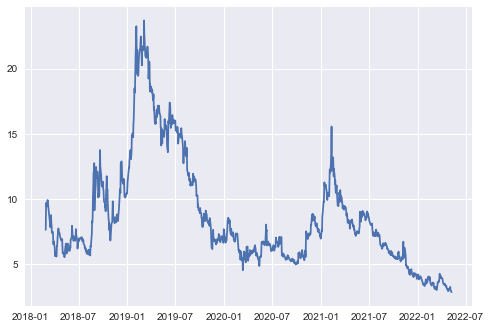

In [6]:
plt.plot(df_cron['cron_Close'])

## CRON and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-04   33171.80   34117.74  33021.84    34061.06  479098068.0   
2022-05-05   33854.17   33854.17  32685.10    32997.97  507031169.0   
2022-05-06   32773.88   33055.84  32474.69    32899.37  457941820.0   
2022-05-09   32685.17   32685.17  32121.98    32245.70  535207901.0   
2022-05-10   32504.09   32752.17  31887.89    32160.74  493104054.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-04         33128.79         32997.97     932.27      0.028141   
2022-05-05         34061.06         32899.37   -1063.09     -0.031211   
2022-05-06         32997.97         32245.70     -98.60     -0.002988   
2022-05-09         32899.37         32160.74    -653.67     -0.019869   
2022-05-10         32245.70              NaN     -84.96     -0.002635   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-04            33428.990             151.826             33634.068   
2022-05-05            33245.306            -183.684             33454.589   
2022-05-06            33229.738             -15.568             33363.386   
2022-05-09            33066.578            -163.160             33183.010   
2022-05-10            32872.968            -193.610             33075.066   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-04             -109.973  
2022-05-05             -179.479  
2022-05-06              -91.203  
2022-05-09             -180.376  
2022-05-10             -107.944  

[32631 rows x 13 columns]

In [8]:
df0 = pd.merge(df_cron, df_dow, on='Date', how='left')
df0

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24      8.380     7.170        7.62      2801000   
2018-02-28       7.75      9.170     7.335        9.17      9875400   
2018-03-01       9.18     10.050     8.520        9.69     11858800   
2018-03-02       9.50      9.700     9.250        9.40      3325100   
2018-03-05       9.67     10.250     9.460        9.77      6488200   
...               ...        ...       ...         ...          ...   
2022-05-03       3.12      3.200     3.045        3.08      1096100   
2022-05-04       3.08      3.250     2.975        3.24      1505300   
2022-05-05       3.20      3.205     3.000        3.01      1144500   
2022-05-06       3.00      3.040     2.885        2.96      1624400   
2022-05-09       2.91      2.980     2.820        2.83      4010300   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27              NaN             9.17        NaN           NaN   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   
...                     ...              ...        ...           ...   
2022-05-03             3.13             3.24      -0.05     -0.015974   
2022-05-04             3.08             3.01       0.16      0.051948   
2022-05-05             3.24             2.96      -0.23     -0.070988   
2022-05-06             3.01             2.83      -0.05     -0.016611   
2022-05-09             2.96              NaN      -0.13     -0.043919   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                  NaN                 NaN                   NaN   
2018-02-28                  NaN                 NaN                   NaN   
2018-03-01                  NaN                 NaN                   NaN   
2018-03-02                  NaN                 NaN                   NaN   
2018-03-05                9.130                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-03                3.038               0.034                 3.057   
2022-05-04                3.102               0.064                 3.060   
2022-05-05                3.096              -0.006                 3.049   
2022-05-06                3.084              -0.012                 3.039   
2022-05-09                3.024              -0.060                 3.014   

            cron_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-02-27                  NaN   25735.78   25800.35  25407.83    25410.03   
2018-02-28                  NaN   25485.15   25576.15  25022.42    25029.20   
2018-03-01                  NaN   25024.04   25185.35  24442.56    24608.98   
2018-03-02                  NaN   24394.91   24592.46  24217.76    24538.06   
2018-03-05                  NaN   24471.31   24961.00  24387.15    24874.76   
...                         ...        ...        ...       ...         ...   
2022-05-03               -0.025   33086.09   33341.58  32914.75    33128.79   
2022-05-04                0.003   33171.80   34117.74  33021.84    34061.06   
2022-05-05               -0.011   33854.17   33854.17  32685.10    32997.97   
2022-05-06               -0.010   32773.88   33055.84  32474.69    32899.37   
2022-05-09               -0.025   32685.17   32685.17  32121.98    32245.70   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                

In [9]:
df_isna0 = df0.isna()
df_isna0

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27      False      False     False       False        False   
2018-02-28      False      False     False       False        False   
2018-03-01      False      False     False       False        False   
2018-03-02      False      False     False       False        False   
2018-03-05      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-03      False      False     False       False        False   
2022-05-04      False      False     False       False        False   
2022-05-05      False      False     False       False        False   
2022-05-06      False      False     False       False        False   
2022-05-09      False      False     False       False        False   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             True            False       True          True   
2018-02-28            False            False      False         False   
2018-03-01            False            False      False         False   
2018-03-02            False            False      False         False   
2018-03-05            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-03            False            False      False         False   
2022-05-04            False            False      False         False   
2022-05-05            False            False      False         False   
2022-05-06            False            False      False         False   
2022-05-09            False             True      False         False   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                 True                True                  True   
2018-02-28                 True                True                  True   
2018-03-01                 True                True                  True   
2018-03-02                 True                True                  True   
2018-03-05                False                True                  True   
...                         ...                 ...                   ...   
2022-05-03                False               False                 False   
2022-05-04                False               False                 False   
2022-05-05                False               False                 False   
2022-05-06                False               False                 False   
2022-05-09                False               False                 False   

            cron_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-02-27                 True      False      False     False       False   
2018-02-28                 True      False      False     False       False   
2018-03-01                 True      False      False     False       False   
2018-03-02                 True      False      False     False       False   
2018-03-05                 True      False      False     False       False   
...                         ...        ...        ...       ...         ...   
2022-05-03                False      False      False     False       False   
2022-05-04                False      False      False     False       False   
2022-05-05                False      False      False     False       False   
2022-05-06                False      False      False     False       False   
2022-05-09                False      False      False     False       False   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24       8.38     7.170        7.62      2801000   
2018-02-28       7.75       9.17     7.335        9.17      9875400   
2018-03-01       9.18      10.05     8.520        9.69     11858800   
2018-03-02       9.50       9.70     9.250        9.40      3325100   
2018-03-05       9.67      10.25     9.460        9.77      6488200   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             0.00             9.17       0.00      0.000000   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                 0.00                 0.0                   0.0   
2018-02-28                 0.00                 0.0                   0.0   
2018-03-01                 0.00                 0.0                   0.0   
2018-03-02                 0.00                 0.0                   0.0   
2018-03-05                 9.13                 0.0                   0.0   

            cron_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-02-27                  0.0   25735.78   25800.35  25407.83    25410.03   
2018-02-28                  0.0   25485.15   25576.15  25022.42    25029.20   
2018-03-01                  0.0   25024.04   25185.35  24442.56    24608.98   
2018-03-02                  0.0   24394.91   24592.46  24217.76    24538.06   
2018-03-05                  0.0   24471.31   24961.00  24387.15    24874.76   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2018-02-27  438308772.0         25709.27         25029.20    -299.24   
2018-02-28  451844482.0         25410.03         24608.98    -380.83   
2018-03-01  506306593.0         25029.20         24538.06    -420.22   
2018-03-02  437110946.0         24608.98         24874.76     -70.92   
2018-03-05  383880485.0         24538.06         24884.12     336.70   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2018-02-27     -0.011639            25237.910              89.056   
2018-02-28     -0.014987            25284.194              46.284   
2018-03-01     -0.016789            25213.494             -70.700   
2018-03-02     -0.002882            25059.108            -154.386   
2018-03-05      0.013722            24892.206            -166.902   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2018-02-27             25110.799               80.876  
2018-02-28             25149.674               38.875  
2018-03-01             25121.223              -28.451  
2018-03-02             25054.992              -66.231  
2018-03-05             25020.530              -34.462

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24      8.380     7.170        7.62      2801000   
2018-02-28       7.75      9.170     7.335        9.17      9875400   
2018-03-01       9.18     10.050     8.520        9.69     11858800   
2018-03-02       9.50      9.700     9.250        9.40      3325100   
2018-03-05       9.67     10.250     9.460        9.77      6488200   
...               ...        ...       ...         ...          ...   
2022-05-03       3.12      3.200     3.045        3.08      1096100   
2022-05-04       3.08      3.250     2.975        3.24      1505300   
2022-05-05       3.20      3.205     3.000        3.01      1144500   
2022-05-06       3.00      3.040     2.885        2.96      1624400   
2022-05-09       2.91      2.980     2.820        2.83      4010300   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             0.00             9.17       0.00      0.000000   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   
...                     ...              ...        ...           ...   
2022-05-03             3.13             3.24      -0.05     -0.015974   
2022-05-04             3.08             3.01       0.16      0.051948   
2022-05-05             3.24             2.96      -0.23     -0.070988   
2022-05-06             3.01             2.83      -0.05     -0.016611   
2022-05-09             2.96             0.00      -0.13     -0.043919   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                0.000               0.000                 0.000   
2018-02-28                0.000               0.000                 0.000   
2018-03-01                0.000               0.000                 0.000   
2018-03-02                0.000               0.000                 0.000   
2018-03-05                9.130               0.000                 0.000   
...                         ...                 ...                   ...   
2022-05-03                3.038               0.034                 3.057   
2022-05-04                3.102               0.064                 3.060   
2022-05-05                3.096              -0.006                 3.049   
2022-05-06                3.084              -0.012                 3.039   
2022-05-09                3.024              -0.060                 3.014   

            cron_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-02-27                0.000   25735.78   25800.35  25407.83    25410.03   
2018-02-28                0.000   25485.15   25576.15  25022.42    25029.20   
2018-03-01                0.000   25024.04   25185.35  24442.56    24608.98   
2018-03-02                0.000   24394.91   24592.46  24217.76    24538.06   
2018-03-05                0.000   24471.31   24961.00  24387.15    24874.76   
...                         ...        ...        ...       ...         ...   
2022-05-03               -0.025   33086.09   33341.58  32914.75    33128.79   
2022-05-04                0.003   33171.80   34117.74  33021.84    34061.06   
2022-05-05               -0.011   33854.17   33854.17  32685.10    32997.97   
2022-05-06               -0.010   32773.88   33055.84  32474.69    32899.37   
2022-05-09               -0.025   32685.17   32685.17  32121.98    32245.70   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cron_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2018-02-27      2   27  2018        1       8.24       8.38     7.170   
2018-02-28      2   28  2018        1       7.75       9.17     7.335   
2018-03-01      3    1  2018        1       9.18      10.05     8.520   
2018-03-02      3    2  2018        1       9.50       9.70     9.250   
2018-03-05      3    5  2018        1       9.67      10.25     9.460   

            cron_Close  cron_Volume  cron_prev_close  cron_next_close  \
Date                                                                    
2018-02-27        7.62      2801000             0.00             9.17   
2018-02-28        9.17      9875400             7.62             9.69   
2018-03-01        9.69     11858800             9.17             9.40   
2018-03-02        9.40      3325100             9.69             9.77   
2018-03-05        9.77      6488200             9.40             9.91   

            cron_diff  cron_%change  cron_5day_avg_close  cron_5day_avg_diff  \
Date                                                                           
2018-02-27       0.00      0.000000                 0.00                 0.0   
2018-02-28       1.55      0.203412                 0.00                 0.0   
2018-03-01       0.52      0.056707                 0.00                 0.0   
2018-03-02      -0.29     -0.029928                 0.00                 0.0   
2018-03-05       0.37      0.039362                 9.13                 0.0   

            cron_10day_avg_close  cron_10day_avg_diff  djix_Open  djix_High  \
Date                                                                          
2018-02-27                   0.0                  0.0   25735.78   25800.35   
2018-02-28                   0.0                  0.0   25485.15   25576.15   
2018-03-01                   0.0                  0.0   25024.04   25185.35   
2018-03-02                   0.0                  0.0   24394.91   24592.46   
2018-03-05                   0.0                  0.0   24471.31   24961.00   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2018-02-27  25407.83    25410.03  438308772.0         25709.27   
2018-02-28  25022.42    25029.20  451844482.0         25410.03   
2018-03-01  24442.56    24608.98  506306593.0         25029.20   
2018-03-02  24217.76    24538.06  437110946.0         24608.98   
2018-03-05  24387.15    24874.76  383880485.0         24538.06   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2018-02-27         25029.20    -299.24     -0.011639            25237.910   
2018-02-28         24608.98    -380.83     -0.014987            25284.194   
2018-03-01         24538.06    -420.22     -0.016789            25213.494   
2018-03-02         24874.76     -70.92     -0.002882            25059.108   
2018-03-05         24884.12     336.70      0.013722            24892.206   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2018-02-27              89.056             25110.799               80.876   
2018-02-28              46.284             25149.674               38.875   
2018-03-01             -70.700             25121.223              -28.451   
2018-03-02            -154.386             25054.992              -66.231   
2018-03-05            -166.902             25020.530              -34.462   

            cron_Open_b  cron_High_b  cron_Low_b  cron_Close_b  cron_Volume_b  \
Date                                                                            
2018-02-27        False        False       False         False          False   
2018-02-28        False        False       False         False          False   
2018-0

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(1057, 56)

In [18]:
n = int(len(df0) * 0.9)
n

951

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

951
106


In [21]:
X_train0 = train0.drop('cron_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2018-02-27      2   27  2018        1       8.24       8.38     7.170   
2018-02-28      2   28  2018        1       7.75       9.17     7.335   
2018-03-01      3    1  2018        1       9.18      10.05     8.520   

            cron_Close  cron_Volume  cron_prev_close  cron_diff  cron_%change  \
Date                                                                            
2018-02-27        7.62      2801000             0.00       0.00      0.000000   
2018-02-28        9.17      9875400             7.62       1.55      0.203412   
2018-03-01        9.69     11858800             9.17       0.52      0.056707   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                  0.0                 0.0                   0.0   
2018-02-28                  0.0                 0.0                   0.0   
2018-03-01                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-02-27                  0.0   25735.78   25800.35  25407.83    25410.03   
2018-02-28                  0.0   25485.15   25576.15  25022.42    25029.20   
2018-03-01                  0.0   25024.04   25185.35  24442.56    24608.98   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2018-02-27  438308772.0         25709.27         25029.20    -299.24   
2018-02-28  451844482.0         25410.03         24608.98    -380.83   
2018-03-01  506306593.0         25029.20         24538.06    -420.22   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2018-02-27     -0.011639            25237.910              89.056   
2018-02-28     -0.014987            25284.194              46.284   
2018-03-01     -0.016789            25213.494             -70.700   

            djix_10day_avg_close  djix_10day_avg_diff  cron_Open_b  \
Date                                                                 
2018-02-27             25110.799               80.876        False   
2018-02-28             25149.674               38.875        False   
2018-03-01             25121.223              -28.451        False   

            cron_High_b  cron_Low_b  cron_Close_b  cron_Volume_b  \
Date                                                               
2018-02-27        False       False         False          False   
2018-02-28        False       False         False          False   
2018-03-01        False       False         False          False   

            cron_prev_close_b  cron_next_close_b  cron_diff_b  cron_%change_b  \
Date                                                                            
2018-02-27               True              False         True            True   
2018-02-28              False              False        False           False   
2018-03-01              False              False        False           False   

            cron_5day_avg_close_b  cron_5day_avg_diff_b  \
Date                                                      
2018-02-27                   True                  True   
2018-02-28                   True                  True   
2018-03-01                   True                  True   

            cron_10day_avg_close_b  cron_10day_avg_diff_b  djix_Open_b  \
Date                                                                     
2018-02-27                    True                   True        False   
2018-02-28                    True                   True        False   
2018-03-01                    True                   True    

In [22]:
X_train0.shape

(951, 55)

In [23]:
y_train0 = train0['cron_next_close']
y_train0.head(3)

Date
2018-02-27    9.17
2018-02-28    9.69
2018-03-01    9.40
Name: cron_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2021-12-01    4.40
2021-12-02    4.16
2021-12-03    4.32
Name: cron_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('cron_next_close', axis=1)
y_test0 = test0['cron_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2021-12-06     12    6  2021        4       4.12      4.385      3.96   
2021-12-07     12    7  2021        4       4.38      4.585      4.36   
2021-12-08     12    8  2021        4       4.51      4.730      4.40   

            cron_Close  cron_Volume  cron_prev_close  cron_diff  cron_%change  \
Date                                                                            
2021-12-06        4.32      2676000             4.16       0.16      0.038462   
2021-12-07        4.51      2674500             4.32       0.19      0.043981   
2021-12-08        4.60      2149800             4.51       0.09      0.019956   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-06                4.324              -0.028                 4.493   
2021-12-07                4.320              -0.004                 4.475   
2021-12-08                4.398               0.078                 4.467   

            cron_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2021-12-06               -0.061   34633.43   35356.75  34633.43    35227.03   
2021-12-07               -0.018   35423.99   35819.47  35423.99    35719.43   
2021-12-08               -0.008   35716.85   35840.52  35602.65    35754.75   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2021-12-06  484207074.0         34580.08         35719.43     646.95   
2021-12-07  537278770.0         35227.03         35754.75     492.40   
2021-12-08  439232631.0         35719.43         35754.69      35.32   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2021-12-06      0.018709            34590.532              18.218   
2021-12-07      0.013978            34837.674             247.142   
2021-12-08      0.000989            35184.216             346.542   

            djix_10day_avg_close  djix_10day_avg_diff  cron_Open_b  \
Date                                                                 
2021-12-06             35022.537              -37.495        False   
2021-12-07             35032.555               10.018        False   
2021-12-08             35026.650               -5.905        False   

            cron_High_b  cron_Low_b  cron_Close_b  cron_Volume_b  \
Date                                                               
2021-12-06        False       False         False          False   
2021-12-07        False       False         False          False   
2021-12-08        False       False         False          False   

            cron_prev_close_b  cron_next_close_b  cron_diff_b  cron_%change_b  \
Date                                                                            
2021-12-06              False              False        False           False   
2021-12-07              False              False        False           False   
2021-12-08              False              False        False           False   

            cron_5day_avg_close_b  cron_5day_avg_diff_b  \
Date                                                      
2021-12-06                  False                 False   
2021-12-07                  False                 False   
2021-12-08                  False                 False   

            cron_10day_avg_close_b  cron_10day_avg_diff_b  djix_Open_b  \
Date                                                                     
2021-12-06                   False                  False        False   
2021-12-07                   False                  False        False   
2021-12-08                   False                  False    

In [27]:
X_test0.shape

(106, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-04    3.01
2022-05-05    2.96
2022-05-06    2.83
Name: cron_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([4.55255426, 4.59254342, 4.60086992, 4.53612009, 4.124542  ])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

0.147685356784776


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

0.1140772366485


In [34]:
hyper_table.append(dict(version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

In [35]:
y_train0 = pd.DataFrame(y_train0, columns=['cron_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['cron_next_close'])

In [36]:
y_test0['cron_pred_next_close'] = y_pred0

In [37]:
y_test0.tail()

cron_next_close  cron_pred_next_close
Date                                             
2022-05-02             3.08              3.146959
2022-05-03             3.24              3.394115
2022-05-04             3.01              3.077846
2022-05-05             2.96              2.816600
2022-05-06             2.83              2.704324

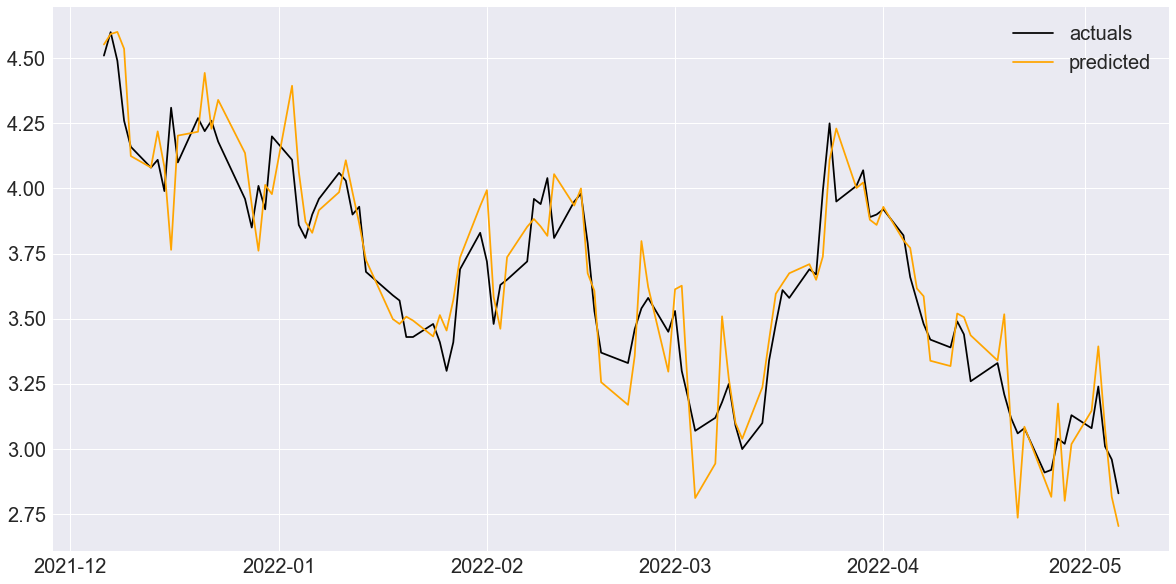

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['cron_next_close'], color='black')
ax.plot(y_test0['cron_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## CRON and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_cron, df_etfs, on='Date', how='left')
df1

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24      8.380     7.170        7.62      2801000   
2018-02-28       7.75      9.170     7.335        9.17      9875400   
2018-03-01       9.18     10.050     8.520        9.69     11858800   
2018-03-02       9.50      9.700     9.250        9.40      3325100   
2018-03-05       9.67     10.250     9.460        9.77      6488200   
...               ...        ...       ...         ...          ...   
2022-05-03       3.12      3.200     3.045        3.08      1096100   
2022-05-04       3.08      3.250     2.975        3.24      1505300   
2022-05-05       3.20      3.205     3.000        3.01      1144500   
2022-05-06       3.00      3.040     2.885        2.96      1624400   
2022-05-09       2.91      2.980     2.820        2.83      4010300   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27              NaN             9.17        NaN           NaN   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   
...                     ...              ...        ...           ...   
2022-05-03             3.13             3.24      -0.05     -0.015974   
2022-05-04             3.08             3.01       0.16      0.051948   
2022-05-05             3.24             2.96      -0.23     -0.070988   
2022-05-06             3.01             2.83      -0.05     -0.016611   
2022-05-09             2.96              NaN      -0.13     -0.043919   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                  NaN                 NaN                   NaN   
2018-02-28                  NaN                 NaN                   NaN   
2018-03-01                  NaN                 NaN                   NaN   
2018-03-02                  NaN                 NaN                   NaN   
2018-03-05                9.130                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-03                3.038               0.034                 3.057   
2022-05-04                3.102               0.064                 3.060   
2022-05-05                3.096              -0.006                 3.049   
2022-05-06                3.084              -0.012                 3.039   
2022-05-09                3.024              -0.060                 3.014   

            cron_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-02-27                  NaN  32.020000  32.180000  30.573000  30.850000   
2018-02-28                  NaN  30.910000  31.959999  30.680000  31.799999   
2018-03-01                  NaN  31.799999  32.580002  31.500000  32.480000   
2018-03-02                  NaN  32.099998  32.549999  31.885000  32.439999   
2018-03-05                  NaN  32.340000  33.400002  32.327999  33.310001   
...                         ...        ...        ...        ...        ...   
2022-05-03               -0.025   8.340000   8.470000   8.240000   8.320000   
2022-05-04                0.003   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.011   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.010   8.010000   8.050000   7.750000   7.900000   
2022-05-09               -0.025   7.790000   7.800000   7.440000   7.450000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                           

In [41]:
df_isna1 = df1.isna()
df_isna1

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27      False      False     False       False        False   
2018-02-28      False      False     False       False        False   
2018-03-01      False      False     False       False        False   
2018-03-02      False      False     False       False        False   
2018-03-05      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-03      False      False     False       False        False   
2022-05-04      False      False     False       False        False   
2022-05-05      False      False     False       False        False   
2022-05-06      False      False     False       False        False   
2022-05-09      False      False     False       False        False   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             True            False       True          True   
2018-02-28            False            False      False         False   
2018-03-01            False            False      False         False   
2018-03-02            False            False      False         False   
2018-03-05            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-03            False            False      False         False   
2022-05-04            False            False      False         False   
2022-05-05            False            False      False         False   
2022-05-06            False            False      False         False   
2022-05-09            False             True      False         False   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                 True                True                  True   
2018-02-28                 True                True                  True   
2018-03-01                 True                True                  True   
2018-03-02                 True                True                  True   
2018-03-05                False                True                  True   
...                         ...                 ...                   ...   
2022-05-03                False               False                 False   
2022-05-04                False               False                 False   
2022-05-05                False               False                 False   
2022-05-06                False               False                 False   
2022-05-09                False               False                 False   

            cron_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2018-02-27                 True    False    False   False     False   
2018-02-28                 True    False    False   False     False   
2018-03-01                 True    False    False   False     False   
2018-03-02                 True    False    False   False     False   
2018-03-05                 True    False    False   False     False   
...                         ...      ...      ...     ...       ...   
2022-05-03                False    False    False   False     False   
2022-05-04                False    False    False   False     False   
2022-05-05                False    False    False   False     False   
2022-05-06                False    False    False   False     False   
2022-05-09                False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2018-02-27      False          False          False    False

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24       8.38     7.170        7.62      2801000   
2018-02-28       7.75       9.17     7.335        9.17      9875400   
2018-03-01       9.18      10.05     8.520        9.69     11858800   
2018-03-02       9.50       9.70     9.250        9.40      3325100   
2018-03-05       9.67      10.25     9.460        9.77      6488200   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             0.00             9.17       0.00      0.000000   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                 0.00                 0.0                   0.0   
2018-02-28                 0.00                 0.0                   0.0   
2018-03-01                 0.00                 0.0                   0.0   
2018-03-02                 0.00                 0.0                   0.0   
2018-03-05                 9.13                 0.0                   0.0   

            cron_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-02-27                  0.0  32.020000  32.180000  30.573000  30.850000   
2018-02-28                  0.0  30.910000  31.959999  30.680000  31.799999   
2018-03-01                  0.0  31.799999  32.580002  31.500000  32.480000   
2018-03-02                  0.0  32.099998  32.549999  31.885000  32.439999   
2018-03-05                  0.0  32.340000  33.400002  32.327999  33.310001   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-02-27     562300      31.959999      31.799999 -1.109999   -0.034731   
2018-02-28     336900      30.850000      32.480000  0.949999    0.030794   
2018-03-01     308100      31.799999      32.439999  0.680001    0.021384   
2018-03-02     155900      32.480000      33.310001 -0.040001   -0.001232   
2018-03-05     275400      32.439999      33.730000  0.870002    0.026819   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-02-27          31.881999            -0.374           32.335999   
2018-02-28          31.741999            -0.140           32.278999   
2018-03-01          31.809999             0.068           32.209999   
2018-03-02          31.905999             0.096           32.123999   
2018-03-05          32.176000             0.270           32.216000   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-02-27             -0.155        0.0        0.0       0.0         0.0   
2018-02-28             -0.057        0.0        0.0       0.0         0.0   
2018-03-01             -0.069        0.0        0.0       0.0         0.0   
2018-03-02             -0.086        0.0        0.0       0.0         0.0   
2018-03-05              0.092        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-02-27          0.0              0.0              0.0        0.0   
2018-02-28          0.0              0.0              0.0        0.0   
2018-03-01          0.0              0.0  

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24      8.380     7.170        7.62      2801000   
2018-02-28       7.75      9.170     7.335        9.17      9875400   
2018-03-01       9.18     10.050     8.520        9.69     11858800   
2018-03-02       9.50      9.700     9.250        9.40      3325100   
2018-03-05       9.67     10.250     9.460        9.77      6488200   
...               ...        ...       ...         ...          ...   
2022-05-03       3.12      3.200     3.045        3.08      1096100   
2022-05-04       3.08      3.250     2.975        3.24      1505300   
2022-05-05       3.20      3.205     3.000        3.01      1144500   
2022-05-06       3.00      3.040     2.885        2.96      1624400   
2022-05-09       2.91      2.980     2.820        2.83      4010300   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             0.00             9.17       0.00      0.000000   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   
...                     ...              ...        ...           ...   
2022-05-03             3.13             3.24      -0.05     -0.015974   
2022-05-04             3.08             3.01       0.16      0.051948   
2022-05-05             3.24             2.96      -0.23     -0.070988   
2022-05-06             3.01             2.83      -0.05     -0.016611   
2022-05-09             2.96             0.00      -0.13     -0.043919   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                0.000               0.000                 0.000   
2018-02-28                0.000               0.000                 0.000   
2018-03-01                0.000               0.000                 0.000   
2018-03-02                0.000               0.000                 0.000   
2018-03-05                9.130               0.000                 0.000   
...                         ...                 ...                   ...   
2022-05-03                3.038               0.034                 3.057   
2022-05-04                3.102               0.064                 3.060   
2022-05-05                3.096              -0.006                 3.049   
2022-05-06                3.084              -0.012                 3.039   
2022-05-09                3.024              -0.060                 3.014   

            cron_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-02-27                0.000  32.020000  32.180000  30.573000  30.850000   
2018-02-28                0.000  30.910000  31.959999  30.680000  31.799999   
2018-03-01                0.000  31.799999  32.580002  31.500000  32.480000   
2018-03-02                0.000  32.099998  32.549999  31.885000  32.439999   
2018-03-05                0.000  32.340000  33.400002  32.327999  33.310001   
...                         ...        ...        ...        ...        ...   
2022-05-03               -0.025   8.340000   8.470000   8.240000   8.320000   
2022-05-04                0.003   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.011   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.010   8.010000   8.050000   7.750000   7.900000   
2022-05-09               -0.025   7.790000   7.800000   7.440000   7.450000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                           

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cron_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2018-02-27      2   27  2018        1       8.24      8.380     7.170   
2018-02-28      2   28  2018        1       7.75      9.170     7.335   
2018-03-01      3    1  2018        1       9.18     10.050     8.520   
2018-03-02      3    2  2018        1       9.50      9.700     9.250   
2018-03-05      3    5  2018        1       9.67     10.250     9.460   
...           ...  ...   ...      ...        ...        ...       ...   
2022-05-03      5    3  2022        2       3.12      3.200     3.045   
2022-05-04      5    4  2022        2       3.08      3.250     2.975   
2022-05-05      5    5  2022        2       3.20      3.205     3.000   
2022-05-06      5    6  2022        2       3.00      3.040     2.885   
2022-05-09      5    9  2022        2       2.91      2.980     2.820   

            cron_Close  cron_Volume  cron_prev_close  cron_next_close  \
Date                                                                    
2018-02-27        7.62      2801000             0.00             9.17   
2018-02-28        9.17      9875400             7.62             9.69   
2018-03-01        9.69     11858800             9.17             9.40   
2018-03-02        9.40      3325100             9.69             9.77   
2018-03-05        9.77      6488200             9.40             9.91   
...                ...          ...              ...              ...   
2022-05-03        3.08      1096100             3.13             3.24   
2022-05-04        3.24      1505300             3.08             3.01   
2022-05-05        3.01      1144500             3.24             2.96   
2022-05-06        2.96      1624400             3.01             2.83   
2022-05-09        2.83      4010300             2.96             0.00   

            cron_diff  cron_%change  cron_5day_avg_close  cron_5day_avg_diff  \
Date                                                                           
2018-02-27       0.00      0.000000                0.000               0.000   
2018-02-28       1.55      0.203412                0.000               0.000   
2018-03-01       0.52      0.056707                0.000               0.000   
2018-03-02      -0.29     -0.029928                0.000               0.000   
2018-03-05       0.37      0.039362                9.130               0.000   
...               ...           ...                  ...                 ...   
2022-05-03      -0.05     -0.015974                3.038               0.034   
2022-05-04       0.16      0.051948                3.102               0.064   
2022-05-05      -0.23     -0.070988                3.096              -0.006   
2022-05-06      -0.05     -0.016611                3.084              -0.012   
2022-05-09      -0.13     -0.043919                3.024              -0.060   

            cron_10day_avg_close  cron_10day_avg_diff    mj_Open    mj_High  \
Date                                                                          
2018-02-27                 0.000                0.000  32.020000  32.180000   
2018-02-28                 0.000                0.000  30.910000  31.959999   
2018-03-01                 0.000                0.000  31.799999  32.580002   
2018-03-02                 0.000                0.000  32.099998  32.549999   
2018-03-05                 0.000                0.000  32.340000  33.400002   
...                          ...                  ...        ...        ...   
2022-05-03                 3.057               -0.025   8.340000   8.470000   
2022-05-04                 3.060                0.003   8.340000   8.590000   
2022-05-05                 3.049               -0.011   8.500000   8.508000   
2022-05-06                 3.039               -0.010   8.010000   8.050000   
2022-05-09                 3.014               -0.025   7.790000   7.800000   

               mj_Low   mj_Close  mj_Volume

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

951

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

951
106


In [52]:
X_train1 = train1.drop('cron_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2018-02-27      2   27  2018        1       8.24       8.38     7.170   
2018-02-28      2   28  2018        1       7.75       9.17     7.335   
2018-03-01      3    1  2018        1       9.18      10.05     8.520   

            cron_Close  cron_Volume  cron_prev_close  cron_diff  cron_%change  \
Date                                                                            
2018-02-27        7.62      2801000             0.00       0.00      0.000000   
2018-02-28        9.17      9875400             7.62       1.55      0.203412   
2018-03-01        9.69     11858800             9.17       0.52      0.056707   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                  0.0                 0.0                   0.0   
2018-02-28                  0.0                 0.0                   0.0   
2018-03-01                  0.0                 0.0                   0.0   

            cron_10day_avg_diff    mj_Open    mj_High  mj_Low   mj_Close  \
Date                                                                       
2018-02-27                  0.0  32.020000  32.180000  30.573  30.850000   
2018-02-28                  0.0  30.910000  31.959999  30.680  31.799999   
2018-03-01                  0.0  31.799999  32.580002  31.500  32.480000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-02-27     562300      31.959999      31.799999 -1.109999   -0.034731   
2018-02-28     336900      30.850000      32.480000  0.949999    0.030794   
2018-03-01     308100      31.799999      32.439999  0.680001    0.021384   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-02-27          31.881999            -0.374           32.335999   
2018-02-28          31.741999            -0.140           32.278999   
2018-03-01          31.809999             0.068           32.209999   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-02-27             -0.155        0.0        0.0       0.0         0.0   
2018-02-28             -0.057        0.0        0.0       0.0         0.0   
2018-03-01             -0.069        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-02-27          0.0              0.0              0.0        0.0   
2018-02-28          0.0              0.0              0.0        0.0   
2018-03-01          0.0              0.0              0.0        0.0   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2018-02-27           0.0                  0.0                 0.0   
2018-02-28           0.0                  0.0                 0.0   
2018-03-01           0.0                  0.0                 0.0   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2018-02-27                   0.0                  0.0        0.0        0.0   
2018-02-28                   0.0                  0.0        0.0        0.0   
2018-03-01                   0.0                  0.0        0.0        0.0   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2018-02-27       0.0         0.0          0.0              0.0   
2018-02-28       0.0         0.0          0.

In [53]:
X_train1.shape

(951, 159)

In [54]:
y_train1 = train1['cron_next_close']
y_train1.head(3)

Date
2018-02-27    9.17
2018-02-28    9.69
2018-03-01    9.40
Name: cron_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2021-12-01    4.40
2021-12-02    4.16
2021-12-03    4.32
Name: cron_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('cron_next_close', axis=1)
y_test1 = test1['cron_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2021-12-06     12    6  2021        4       4.12      4.385      3.96   
2021-12-07     12    7  2021        4       4.38      4.585      4.36   
2021-12-08     12    8  2021        4       4.51      4.730      4.40   

            cron_Close  cron_Volume  cron_prev_close  cron_diff  cron_%change  \
Date                                                                            
2021-12-06        4.32      2676000             4.16       0.16      0.038462   
2021-12-07        4.51      2674500             4.32       0.19      0.043981   
2021-12-08        4.60      2149800             4.51       0.09      0.019956   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-06                4.324              -0.028                 4.493   
2021-12-07                4.320              -0.004                 4.475   
2021-12-08                4.398               0.078                 4.467   

            cron_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2021-12-06               -0.061    11.22   11.700   10.98     11.51   
2021-12-07               -0.018    11.65   12.108   11.65     11.95   
2021-12-08               -0.008    11.94   12.298   11.77     12.19   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2021-12-06    1385200          11.33          11.95     0.18    0.015887   
2021-12-07    1172200          11.51          12.19     0.44    0.038228   
2021-12-08     875600          11.95          11.71     0.24    0.020084   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-12-06             11.612            -0.152              12.162   
2021-12-07             11.590            -0.022              12.078   
2021-12-08             11.738             0.148              12.016   

            mj_10day_avg_diff  msos_Open  msos_High   msos_Low  msos_Close  \
Date                                                                         
2021-12-06             -0.163  26.200001  27.129999  24.850000   24.940001   
2021-12-07             -0.084  25.150000  25.892000  25.100000   25.340000   
2021-12-08             -0.062  25.370001  26.832001  24.938999   26.799999   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-12-06    4242300.0        26.490000        25.340000  -1.549999   
2021-12-07    2156100.0        24.940001        26.799999   0.399999   
2021-12-08    2097700.0        25.340000        26.350000   1.459999   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2021-12-06     -0.058513               25.982              -0.488   
2021-12-07      0.016038               25.746              -0.236   
2021-12-08      0.057616               26.006               0.260   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2021-12-06                26.987               -0.358      13.82     14.400   
2021-12-07                26.793               -0.194      14.02     14.395   
2021-12-08                26.663               -0.130      14.12     14.687   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2021-12-06     13.65      13.937     100700.0           13.890   
2021-12-07     14.02      14.140      75000.0           13.937   
202

In [58]:
X_test1.shape

(106, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-04    3.01
2022-05-05    2.96
2022-05-06    2.83
Name: cron_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([4.36781717, 4.53927891, 4.36466077, 4.3506762 , 4.43086589])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

0.1373615746887057


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

0.11701015698153795


In [64]:
hyper_table.append(dict(version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

In [65]:
y_train1 = pd.DataFrame(y_train1, columns=['cron_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['cron_next_close'])

In [66]:
y_test1['cron_pred_next_close'] = y_pred1

In [67]:
y_test1.tail()

cron_next_close  cron_pred_next_close
Date                                             
2022-05-02             3.08              3.159557
2022-05-03             3.24              3.297817
2022-05-04             3.01              2.884696
2022-05-05             2.96              2.924285
2022-05-06             2.83              3.008671

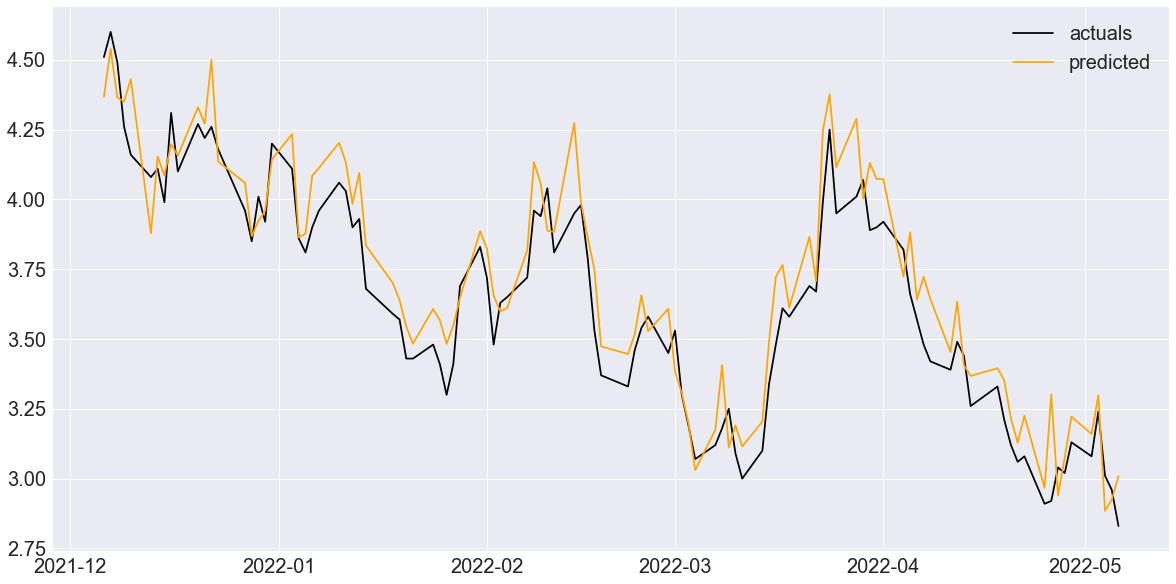

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['cron_next_close'], color='black')
ax.plot(y_test1['cron_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## CRON, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_cron, df_etfs_dow, on='Date', how='left')
df2

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24      8.380     7.170        7.62      2801000   
2018-02-28       7.75      9.170     7.335        9.17      9875400   
2018-03-01       9.18     10.050     8.520        9.69     11858800   
2018-03-02       9.50      9.700     9.250        9.40      3325100   
2018-03-05       9.67     10.250     9.460        9.77      6488200   
...               ...        ...       ...         ...          ...   
2022-05-03       3.12      3.200     3.045        3.08      1096100   
2022-05-04       3.08      3.250     2.975        3.24      1505300   
2022-05-05       3.20      3.205     3.000        3.01      1144500   
2022-05-06       3.00      3.040     2.885        2.96      1624400   
2022-05-09       2.91      2.980     2.820        2.83      4010300   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27              NaN             9.17        NaN           NaN   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   
...                     ...              ...        ...           ...   
2022-05-03             3.13             3.24      -0.05     -0.015974   
2022-05-04             3.08             3.01       0.16      0.051948   
2022-05-05             3.24             2.96      -0.23     -0.070988   
2022-05-06             3.01             2.83      -0.05     -0.016611   
2022-05-09             2.96              NaN      -0.13     -0.043919   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                  NaN                 NaN                   NaN   
2018-02-28                  NaN                 NaN                   NaN   
2018-03-01                  NaN                 NaN                   NaN   
2018-03-02                  NaN                 NaN                   NaN   
2018-03-05                9.130                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-03                3.038               0.034                 3.057   
2022-05-04                3.102               0.064                 3.060   
2022-05-05                3.096              -0.006                 3.049   
2022-05-06                3.084              -0.012                 3.039   
2022-05-09                3.024              -0.060                 3.014   

            cron_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-02-27                  NaN  32.020000  32.180000  30.573000  30.850000   
2018-02-28                  NaN  30.910000  31.959999  30.680000  31.799999   
2018-03-01                  NaN  31.799999  32.580002  31.500000  32.480000   
2018-03-02                  NaN  32.099998  32.549999  31.885000  32.439999   
2018-03-05                  NaN  32.340000  33.400002  32.327999  33.310001   
...                         ...        ...        ...        ...        ...   
2022-05-03               -0.025   8.340000   8.470000   8.240000   8.320000   
2022-05-04                0.003   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.011   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.010   8.010000   8.050000   7.750000   7.900000   
2022-05-09               -0.025   7.790000   7.800000   7.440000   7.450000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                           

In [71]:
df_isna2 = df2.isna()
df_isna2

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27      False      False     False       False        False   
2018-02-28      False      False     False       False        False   
2018-03-01      False      False     False       False        False   
2018-03-02      False      False     False       False        False   
2018-03-05      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-03      False      False     False       False        False   
2022-05-04      False      False     False       False        False   
2022-05-05      False      False     False       False        False   
2022-05-06      False      False     False       False        False   
2022-05-09      False      False     False       False        False   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             True            False       True          True   
2018-02-28            False            False      False         False   
2018-03-01            False            False      False         False   
2018-03-02            False            False      False         False   
2018-03-05            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-03            False            False      False         False   
2022-05-04            False            False      False         False   
2022-05-05            False            False      False         False   
2022-05-06            False            False      False         False   
2022-05-09            False             True      False         False   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                 True                True                  True   
2018-02-28                 True                True                  True   
2018-03-01                 True                True                  True   
2018-03-02                 True                True                  True   
2018-03-05                False                True                  True   
...                         ...                 ...                   ...   
2022-05-03                False               False                 False   
2022-05-04                False               False                 False   
2022-05-05                False               False                 False   
2022-05-06                False               False                 False   
2022-05-09                False               False                 False   

            cron_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2018-02-27                 True    False    False   False     False   
2018-02-28                 True    False    False   False     False   
2018-03-01                 True    False    False   False     False   
2018-03-02                 True    False    False   False     False   
2018-03-05                 True    False    False   False     False   
...                         ...      ...      ...     ...       ...   
2022-05-03                False    False    False   False     False   
2022-05-04                False    False    False   False     False   
2022-05-05                False    False    False   False     False   
2022-05-06                False    False    False   False     False   
2022-05-09                False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2018-02-27      False          False          False    False

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24       8.38     7.170        7.62      2801000   
2018-02-28       7.75       9.17     7.335        9.17      9875400   
2018-03-01       9.18      10.05     8.520        9.69     11858800   
2018-03-02       9.50       9.70     9.250        9.40      3325100   
2018-03-05       9.67      10.25     9.460        9.77      6488200   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             0.00             9.17       0.00      0.000000   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                 0.00                 0.0                   0.0   
2018-02-28                 0.00                 0.0                   0.0   
2018-03-01                 0.00                 0.0                   0.0   
2018-03-02                 0.00                 0.0                   0.0   
2018-03-05                 9.13                 0.0                   0.0   

            cron_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-02-27                  0.0  32.020000  32.180000  30.573000  30.850000   
2018-02-28                  0.0  30.910000  31.959999  30.680000  31.799999   
2018-03-01                  0.0  31.799999  32.580002  31.500000  32.480000   
2018-03-02                  0.0  32.099998  32.549999  31.885000  32.439999   
2018-03-05                  0.0  32.340000  33.400002  32.327999  33.310001   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-02-27     562300      31.959999      31.799999 -1.109999   -0.034731   
2018-02-28     336900      30.850000      32.480000  0.949999    0.030794   
2018-03-01     308100      31.799999      32.439999  0.680001    0.021384   
2018-03-02     155900      32.480000      33.310001 -0.040001   -0.001232   
2018-03-05     275400      32.439999      33.730000  0.870002    0.026819   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-02-27          31.881999            -0.374           32.335999   
2018-02-28          31.741999            -0.140           32.278999   
2018-03-01          31.809999             0.068           32.209999   
2018-03-02          31.905999             0.096           32.123999   
2018-03-05          32.176000             0.270           32.216000   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-02-27             -0.155        0.0        0.0       0.0         0.0   
2018-02-28             -0.057        0.0        0.0       0.0         0.0   
2018-03-01             -0.069        0.0        0.0       0.0         0.0   
2018-03-02             -0.086        0.0        0.0       0.0         0.0   
2018-03-05              0.092        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-02-27          0.0              0.0              0.0        0.0   
2018-02-28          0.0              0.0              0.0        0.0   
2018-03-01          0.0              0.0  

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24      8.380     7.170        7.62      2801000   
2018-02-28       7.75      9.170     7.335        9.17      9875400   
2018-03-01       9.18     10.050     8.520        9.69     11858800   
2018-03-02       9.50      9.700     9.250        9.40      3325100   
2018-03-05       9.67     10.250     9.460        9.77      6488200   
...               ...        ...       ...         ...          ...   
2022-05-03       3.12      3.200     3.045        3.08      1096100   
2022-05-04       3.08      3.250     2.975        3.24      1505300   
2022-05-05       3.20      3.205     3.000        3.01      1144500   
2022-05-06       3.00      3.040     2.885        2.96      1624400   
2022-05-09       2.91      2.980     2.820        2.83      4010300   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             0.00             9.17       0.00      0.000000   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   
...                     ...              ...        ...           ...   
2022-05-03             3.13             3.24      -0.05     -0.015974   
2022-05-04             3.08             3.01       0.16      0.051948   
2022-05-05             3.24             2.96      -0.23     -0.070988   
2022-05-06             3.01             2.83      -0.05     -0.016611   
2022-05-09             2.96             0.00      -0.13     -0.043919   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                0.000               0.000                 0.000   
2018-02-28                0.000               0.000                 0.000   
2018-03-01                0.000               0.000                 0.000   
2018-03-02                0.000               0.000                 0.000   
2018-03-05                9.130               0.000                 0.000   
...                         ...                 ...                   ...   
2022-05-03                3.038               0.034                 3.057   
2022-05-04                3.102               0.064                 3.060   
2022-05-05                3.096              -0.006                 3.049   
2022-05-06                3.084              -0.012                 3.039   
2022-05-09                3.024              -0.060                 3.014   

            cron_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-02-27                0.000  32.020000  32.180000  30.573000  30.850000   
2018-02-28                0.000  30.910000  31.959999  30.680000  31.799999   
2018-03-01                0.000  31.799999  32.580002  31.500000  32.480000   
2018-03-02                0.000  32.099998  32.549999  31.885000  32.439999   
2018-03-05                0.000  32.340000  33.400002  32.327999  33.310001   
...                         ...        ...        ...        ...        ...   
2022-05-03               -0.025   8.340000   8.470000   8.240000   8.320000   
2022-05-04                0.003   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.011   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.010   8.010000   8.050000   7.750000   7.900000   
2022-05-09               -0.025   7.790000   7.800000   7.440000   7.450000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                           

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cron_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2018-02-27      2   27  2018        1       8.24      8.380     7.170   
2018-02-28      2   28  2018        1       7.75      9.170     7.335   
2018-03-01      3    1  2018        1       9.18     10.050     8.520   
2018-03-02      3    2  2018        1       9.50      9.700     9.250   
2018-03-05      3    5  2018        1       9.67     10.250     9.460   
...           ...  ...   ...      ...        ...        ...       ...   
2022-05-03      5    3  2022        2       3.12      3.200     3.045   
2022-05-04      5    4  2022        2       3.08      3.250     2.975   
2022-05-05      5    5  2022        2       3.20      3.205     3.000   
2022-05-06      5    6  2022        2       3.00      3.040     2.885   
2022-05-09      5    9  2022        2       2.91      2.980     2.820   

            cron_Close  cron_Volume  cron_prev_close  cron_next_close  \
Date                                                                    
2018-02-27        7.62      2801000             0.00             9.17   
2018-02-28        9.17      9875400             7.62             9.69   
2018-03-01        9.69     11858800             9.17             9.40   
2018-03-02        9.40      3325100             9.69             9.77   
2018-03-05        9.77      6488200             9.40             9.91   
...                ...          ...              ...              ...   
2022-05-03        3.08      1096100             3.13             3.24   
2022-05-04        3.24      1505300             3.08             3.01   
2022-05-05        3.01      1144500             3.24             2.96   
2022-05-06        2.96      1624400             3.01             2.83   
2022-05-09        2.83      4010300             2.96             0.00   

            cron_diff  cron_%change  cron_5day_avg_close  cron_5day_avg_diff  \
Date                                                                           
2018-02-27       0.00      0.000000                0.000               0.000   
2018-02-28       1.55      0.203412                0.000               0.000   
2018-03-01       0.52      0.056707                0.000               0.000   
2018-03-02      -0.29     -0.029928                0.000               0.000   
2018-03-05       0.37      0.039362                9.130               0.000   
...               ...           ...                  ...                 ...   
2022-05-03      -0.05     -0.015974                3.038               0.034   
2022-05-04       0.16      0.051948                3.102               0.064   
2022-05-05      -0.23     -0.070988                3.096              -0.006   
2022-05-06      -0.05     -0.016611                3.084              -0.012   
2022-05-09      -0.13     -0.043919                3.024              -0.060   

            cron_10day_avg_close  cron_10day_avg_diff    mj_Open    mj_High  \
Date                                                                          
2018-02-27                 0.000                0.000  32.020000  32.180000   
2018-02-28                 0.000                0.000  30.910000  31.959999   
2018-03-01                 0.000                0.000  31.799999  32.580002   
2018-03-02                 0.000                0.000  32.099998  32.549999   
2018-03-05                 0.000                0.000  32.340000  33.400002   
...                          ...                  ...        ...        ...   
2022-05-03                 3.057               -0.025   8.340000   8.470000   
2022-05-04                 3.060                0.003   8.340000   8.590000   
2022-05-05                 3.049               -0.011   8.500000   8.508000   
2022-05-06                 3.039               -0.010   8.010000   8.050000   
2022-05-09                 3.014               -0.025   7.790000   7.800000   

               mj_Low   mj_Close  mj_Volume

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

951

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

951
106


In [82]:
X_train2 = train2.drop('cron_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2018-02-27      2   27  2018        1       8.24       8.38     7.170   
2018-02-28      2   28  2018        1       7.75       9.17     7.335   
2018-03-01      3    1  2018        1       9.18      10.05     8.520   

            cron_Close  cron_Volume  cron_prev_close  cron_diff  cron_%change  \
Date                                                                            
2018-02-27        7.62      2801000             0.00       0.00      0.000000   
2018-02-28        9.17      9875400             7.62       1.55      0.203412   
2018-03-01        9.69     11858800             9.17       0.52      0.056707   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                  0.0                 0.0                   0.0   
2018-02-28                  0.0                 0.0                   0.0   
2018-03-01                  0.0                 0.0                   0.0   

            cron_10day_avg_diff    mj_Open    mj_High  mj_Low   mj_Close  \
Date                                                                       
2018-02-27                  0.0  32.020000  32.180000  30.573  30.850000   
2018-02-28                  0.0  30.910000  31.959999  30.680  31.799999   
2018-03-01                  0.0  31.799999  32.580002  31.500  32.480000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-02-27     562300      31.959999      31.799999 -1.109999   -0.034731   
2018-02-28     336900      30.850000      32.480000  0.949999    0.030794   
2018-03-01     308100      31.799999      32.439999  0.680001    0.021384   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-02-27          31.881999            -0.374           32.335999   
2018-02-28          31.741999            -0.140           32.278999   
2018-03-01          31.809999             0.068           32.209999   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-02-27             -0.155        0.0        0.0       0.0         0.0   
2018-02-28             -0.057        0.0        0.0       0.0         0.0   
2018-03-01             -0.069        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-02-27          0.0              0.0              0.0        0.0   
2018-02-28          0.0              0.0              0.0        0.0   
2018-03-01          0.0              0.0              0.0        0.0   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2018-02-27           0.0                  0.0                 0.0   
2018-02-28           0.0                  0.0                 0.0   
2018-03-01           0.0                  0.0                 0.0   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2018-02-27                   0.0                  0.0        0.0        0.0   
2018-02-28                   0.0                  0.0        0.0        0.0   
2018-03-01                   0.0                  0.0        0.0        0.0   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2018-02-27       0.0         0.0          0.0              0.0   
2018-02-28       0.0         0.0          0.

In [83]:
X_train2.shape

(951, 185)

In [84]:
y_train2 = train2['cron_next_close']
y_train2.head(3)

Date
2018-02-27    9.17
2018-02-28    9.69
2018-03-01    9.40
Name: cron_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2021-12-01    4.40
2021-12-02    4.16
2021-12-03    4.32
Name: cron_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('cron_next_close', axis=1)
y_test2 = test2['cron_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2021-12-06     12    6  2021        4       4.12      4.385      3.96   
2021-12-07     12    7  2021        4       4.38      4.585      4.36   
2021-12-08     12    8  2021        4       4.51      4.730      4.40   

            cron_Close  cron_Volume  cron_prev_close  cron_diff  cron_%change  \
Date                                                                            
2021-12-06        4.32      2676000             4.16       0.16      0.038462   
2021-12-07        4.51      2674500             4.32       0.19      0.043981   
2021-12-08        4.60      2149800             4.51       0.09      0.019956   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-06                4.324              -0.028                 4.493   
2021-12-07                4.320              -0.004                 4.475   
2021-12-08                4.398               0.078                 4.467   

            cron_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2021-12-06               -0.061    11.22   11.700   10.98     11.51   
2021-12-07               -0.018    11.65   12.108   11.65     11.95   
2021-12-08               -0.008    11.94   12.298   11.77     12.19   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2021-12-06    1385200          11.33          11.95     0.18    0.015887   
2021-12-07    1172200          11.51          12.19     0.44    0.038228   
2021-12-08     875600          11.95          11.71     0.24    0.020084   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-12-06             11.612            -0.152              12.162   
2021-12-07             11.590            -0.022              12.078   
2021-12-08             11.738             0.148              12.016   

            mj_10day_avg_diff  msos_Open  msos_High   msos_Low  msos_Close  \
Date                                                                         
2021-12-06             -0.163  26.200001  27.129999  24.850000   24.940001   
2021-12-07             -0.084  25.150000  25.892000  25.100000   25.340000   
2021-12-08             -0.062  25.370001  26.832001  24.938999   26.799999   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-12-06    4242300.0        26.490000        25.340000  -1.549999   
2021-12-07    2156100.0        24.940001        26.799999   0.399999   
2021-12-08    2097700.0        25.340000        26.350000   1.459999   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2021-12-06     -0.058513               25.982              -0.488   
2021-12-07      0.016038               25.746              -0.236   
2021-12-08      0.057616               26.006               0.260   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2021-12-06                26.987               -0.358      13.82     14.400   
2021-12-07                26.793               -0.194      14.02     14.395   
2021-12-08                26.663               -0.130      14.12     14.687   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2021-12-06     13.65      13.937     100700.0           13.890   
2021-12-07     14.02      14.140      75000.0           13.937   
202

In [88]:
X_test2.shape

(106, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-04    3.01
2022-05-05    2.96
2022-05-06    2.83
Name: cron_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([4.34563708, 4.48782912, 4.33294423, 4.35396066, 4.46875384])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

0.1546987773389024


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

0.12653186585507903


In [94]:
hyper_table.append(dict(version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

In [95]:
y_train2 = pd.DataFrame(y_train2, columns=['cron_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['cron_next_close'])

In [96]:
y_test2['cron_pred_next_close'] = y_pred2

In [97]:
y_test2.tail()

cron_next_close  cron_pred_next_close
Date                                             
2022-05-02             3.08              3.113697
2022-05-03             3.24              3.210734
2022-05-04             3.01              3.033292
2022-05-05             2.96              2.939622
2022-05-06             2.83              3.123270

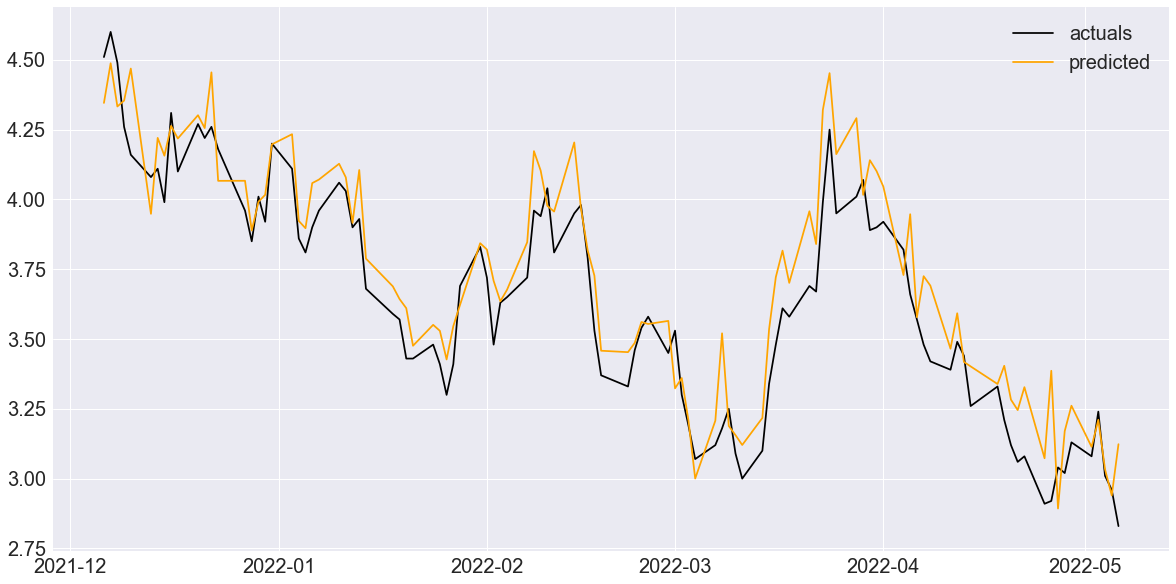

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['cron_next_close'], color='black')
ax.plot(y_test2['cron_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CRON target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy()
df3

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-02-27      2   27  2018        1  21.275000  21.377001  20.070000   
2018-02-28      2   28  2018        1  20.440001  21.680000  20.097000   
2018-03-01      3    1  2018        1  21.309999  23.379999  21.016001   
2018-03-02      3    2  2018        1  23.030001  23.209999  22.219999   
2018-03-05      3    5  2018        1  22.715000  25.100000  22.482000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-02-27  20.636000     1382600       21.549999       21.320000 -0.913999   
2018-02-28  21.320000      733600       20.636000       23.350000  0.684000   
2018-03-01  23.350000     1300700       21.320000       22.521999  2.030000   
2018-03-02  22.521999     1046100       23.350000       24.917000 -0.828001   
2018-03-05  24.917000     1714700       22.521999       25.600000  2.395001   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-02-27    -0.042413             21.8320            -0.5568   
2018-02-28     0.033146             21.5772            -0.2548   
2018-03-01     0.095216             21.7792             0.2020   
2018-03-02    -0.035460             21.8756             0.0964   
2018-03-05     0.106341             22.5490             0.6734   
...                 ...                 ...                ...   
2022-05-03     0.001653              5.7000             0.1520   
2022-05-04     0.100660              5.9880             0.2880   
2022-05-05    -0.089955              6.1120             0.1240   
2022-05-06    -0.016474              6.1640             0.0520   
2022-05-09    -0.070352              6.0640            -0.1000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-02-27              21.9175             -0.0756        0.00       0.000   
2018-02-28              21.9290              0.0115        0.00       0.000   
2018-03-01              22.0890              0.1600        0.00       0.000   
2018-03-02              22.0922              0.0032        0.00       0.000   
2018-03-05              22.4689              0.3767        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03               5.6420              0.0130        4.50       4.750   
2022-05-04               5.7360              0.0940        4.22       4.414   
2022-05-05               5.7680              0.0320        4.20       4.250   
2022-05-06               5.8080              0.0400        3.92       4.340   
2022-05-09               5.8060             -0.0020        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

951

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

951
106


In [112]:
X_train3 = train3.drop('cron_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-02-27      2   27  2018        1  21.275000  21.377001  20.070000   
2018-02-28      2   28  2018        1  20.440001  21.680000  20.097000   
2018-03-01      3    1  2018        1  21.309999  23.379999  21.016001   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-02-27     20.636     1382600       21.549999       21.320000 -0.913999   
2018-02-28     21.320      733600       20.636000       23.350000  0.684000   
2018-03-01     23.350     1300700       21.320000       22.521999  2.030000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-02-27    -0.042413             21.8320            -0.5568   
2018-02-28     0.033146             21.5772            -0.2548   
2018-03-01     0.095216             21.7792             0.2020   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-02-27              21.9175             -0.0756         0.0         0.0   
2018-02-28              21.9290              0.0115         0.0         0.0   
2018-03-01              22.0890              0.1600         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-02-27        0.0          0.0           0.0               0.0   
2018-02-28        0.0          0.0           0.0               0.0   
2018-03-01        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-02-27               0.0         0.0            0.0                   0.0   
2018-02-28               0.0         0.0            0.0                   0.0   
2018-03-01               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-02-27                  0.0                    0.0                   0.0   
2018-02-28                  0.0                    0.0                   0.0   
2018-03-01                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24       8.38     7.170        7.62    2801000.0   
2018-02-28       7.75       9.17     7.335        9.17    9875400.0   
2018-03-01       9.18      10.05     8.520        9.69   11858800.0   

            cron_prev_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2018-02-27             0.00       0.00      0.000000                  0.0   
2018-02-28             7.62       1.55      0.203412                  0.0   
2018-03-01             9.17       0.52      0.056707                  0.0   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2018-02-27                 0.0                   0.0                  0.0   
2018-02-28                 0.0                   0.0                  0.0   
2018-03-01                 0.0                   0.0                  0.0   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-02-27         0.0         0.0        0.0          0.0           0.0   
2018

In [113]:
X_train3.shape

(951, 263)

In [114]:
y_train3 = train3['cron_next_close']
y_train3.head(3)

Date
2018-02-27    9.17
2018-02-28    9.69
2018-03-01    9.40
Name: cron_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2021-12-01    4.40
2021-12-02    4.16
2021-12-03    4.32
Name: cron_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('cron_next_close', axis=1)
y_test3 = test3['cron_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-06     12    6  2021        4      9.98    10.315    9.540      10.15   
2021-12-07     12    7  2021        4     10.21    10.929   10.130      10.64   
2021-12-08     12    8  2021        4     10.71    11.198   10.355      10.94   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-06     7578800            9.99           10.64      0.16     0.016016   
2021-12-07     8810500           10.15           10.94      0.49     0.048276   
2021-12-08     5505400           10.64           10.20      0.30     0.028195   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-06              10.230             -0.182               10.904   
2021-12-07              10.216             -0.014               10.803   
2021-12-08              10.416              0.200               10.735   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-06              -0.203        7.99       8.411      7.593   
2021-12-07              -0.101        7.57       8.204      7.560   
2021-12-08              -0.068        7.56       8.209      7.560   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-06        7.600      865500.0             8.090             7.754   
2021-12-07        7.754      663000.0             7.600             8.130   
2021-12-08        8.130      576200.0             7.754             7.880   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-06      -0.490      -0.060569                8.0220   
2021-12-07       0.154       0.020263                7.9388   
2021-12-08       0.376       0.048491                7.9648   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-06              -0.1600                 8.3263               -0.1180   
2021-12-07              -0.0832                 8.2807               -0.0456   
2021-12-08               0.0260                 8.2142               -0.0665   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-06       4.12      4.385      3.96        4.32    2676000.0   
2021-12-07       4.38      4.585      4.36        4.51    2674500.0   
2021-12-08       4.51      4.730      4.40        4.60    2149800.0   

            cron_prev_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2021-12-06             4.16       0.16      0.038462                4.324   
2021-12-07             4.32       0.19      0.043981                4.320   
2021-12-08             4.51       0.09      0.019956                4.398   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2021-12-06              -0.028                 4.493               -0.061   
2021-12-07              -0.004                 4.475               -0.018   
2021-12-08               0.078                 4.467               -0.008   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2021-12-06       9.305       9.754      8.540         8.57     1050300.0   
2021-12-07       8.215  

In [118]:
X_test3.shape

(106, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-04    3.01
2022-05-05    2.96
2022-05-06    2.83
Name: cron_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([4.17765679, 4.40393807, 4.45154453, 4.25318322, 4.21988694])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

0.15893571065588452


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

0.11578129829961188


In [124]:
hyper_table.append(dict(version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

In [125]:
y_train3 = pd.DataFrame(y_train3, columns=['cron_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['cron_next_close'])

In [126]:
y_test3['cron_pred_next_close'] = y_pred3

In [127]:
y_test3.tail()

cron_next_close  cron_pred_next_close
Date                                             
2022-05-02             3.08              2.957685
2022-05-03             3.24              3.209105
2022-05-04             3.01              2.878315
2022-05-05             2.96              2.856967
2022-05-06             2.83              2.860209

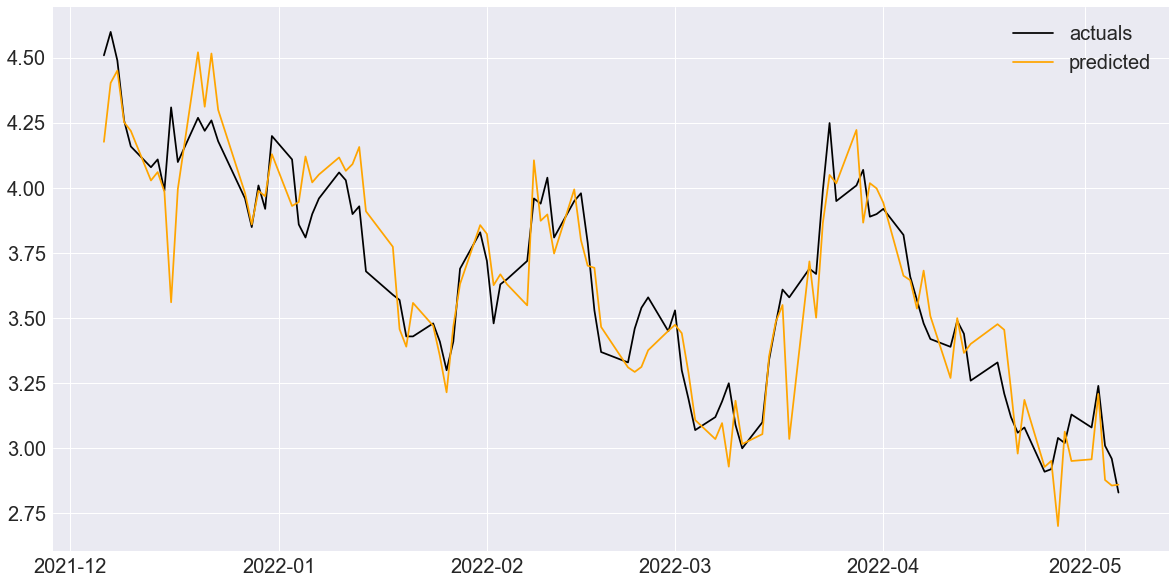

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['cron_next_close'], color='black')
ax.plot(y_test3['cron_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CRON target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy()
df4

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-02-27      2   27  2018        1  21.275000  21.377001  20.070000   
2018-02-28      2   28  2018        1  20.440001  21.680000  20.097000   
2018-03-01      3    1  2018        1  21.309999  23.379999  21.016001   
2018-03-02      3    2  2018        1  23.030001  23.209999  22.219999   
2018-03-05      3    5  2018        1  22.715000  25.100000  22.482000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-02-27  20.636000     1382600       21.549999       21.320000 -0.913999   
2018-02-28  21.320000      733600       20.636000       23.350000  0.684000   
2018-03-01  23.350000     1300700       21.320000       22.521999  2.030000   
2018-03-02  22.521999     1046100       23.350000       24.917000 -0.828001   
2018-03-05  24.917000     1714700       22.521999       25.600000  2.395001   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-02-27    -0.042413             21.8320            -0.5568   
2018-02-28     0.033146             21.5772            -0.2548   
2018-03-01     0.095216             21.7792             0.2020   
2018-03-02    -0.035460             21.8756             0.0964   
2018-03-05     0.106341             22.5490             0.6734   
...                 ...                 ...                ...   
2022-05-03     0.001653              5.7000             0.1520   
2022-05-04     0.100660              5.9880             0.2880   
2022-05-05    -0.089955              6.1120             0.1240   
2022-05-06    -0.016474              6.1640             0.0520   
2022-05-09    -0.070352              6.0640            -0.1000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-02-27              21.9175             -0.0756        0.00       0.000   
2018-02-28              21.9290              0.0115        0.00       0.000   
2018-03-01              22.0890              0.1600        0.00       0.000   
2018-03-02              22.0922              0.0032        0.00       0.000   
2018-03-05              22.4689              0.3767        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03               5.6420              0.0130        4.50       4.750   
2022-05-04               5.7360              0.0940        4.22       4.414   
2022-05-05               5.7680              0.0320        4.20       4.250   
2022-05-06               5.8080              0.0400        3.92       4.340   
2022-05-09               5.8060             -0.0020        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

951

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

951
106


In [142]:
X_train4 = train4.drop('cron_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-02-27      2   27  2018        1  21.275000  21.377001  20.070000   
2018-02-28      2   28  2018        1  20.440001  21.680000  20.097000   
2018-03-01      3    1  2018        1  21.309999  23.379999  21.016001   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-02-27     20.636     1382600       21.549999       21.320000 -0.913999   
2018-02-28     21.320      733600       20.636000       23.350000  0.684000   
2018-03-01     23.350     1300700       21.320000       22.521999  2.030000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-02-27    -0.042413             21.8320            -0.5568   
2018-02-28     0.033146             21.5772            -0.2548   
2018-03-01     0.095216             21.7792             0.2020   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-02-27              21.9175             -0.0756         0.0         0.0   
2018-02-28              21.9290              0.0115         0.0         0.0   
2018-03-01              22.0890              0.1600         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-02-27        0.0          0.0           0.0               0.0   
2018-02-28        0.0          0.0           0.0               0.0   
2018-03-01        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-02-27               0.0         0.0            0.0                   0.0   
2018-02-28               0.0         0.0            0.0                   0.0   
2018-03-01               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-02-27                  0.0                    0.0                   0.0   
2018-02-28                  0.0                    0.0                   0.0   
2018-03-01                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24       8.38     7.170        7.62    2801000.0   
2018-02-28       7.75       9.17     7.335        9.17    9875400.0   
2018-03-01       9.18      10.05     8.520        9.69   11858800.0   

            cron_prev_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2018-02-27             0.00       0.00      0.000000                  0.0   
2018-02-28             7.62       1.55      0.203412                  0.0   
2018-03-01             9.17       0.52      0.056707                  0.0   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2018-02-27                 0.0                   0.0                  0.0   
2018-02-28                 0.0                   0.0                  0.0   
2018-03-01                 0.0                   0.0                  0.0   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-02-27         0.0         0.0        0.0          0.0           0.0   
2018

In [143]:
X_train4.shape

(951, 289)

In [144]:
y_train4 = train4['cron_next_close']
y_train4.head(3)

Date
2018-02-27    9.17
2018-02-28    9.69
2018-03-01    9.40
Name: cron_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2021-12-01    4.40
2021-12-02    4.16
2021-12-03    4.32
Name: cron_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('cron_next_close', axis=1)
y_test4 = test4['cron_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-06     12    6  2021        4      9.98    10.315    9.540      10.15   
2021-12-07     12    7  2021        4     10.21    10.929   10.130      10.64   
2021-12-08     12    8  2021        4     10.71    11.198   10.355      10.94   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-06     7578800            9.99           10.64      0.16     0.016016   
2021-12-07     8810500           10.15           10.94      0.49     0.048276   
2021-12-08     5505400           10.64           10.20      0.30     0.028195   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-06              10.230             -0.182               10.904   
2021-12-07              10.216             -0.014               10.803   
2021-12-08              10.416              0.200               10.735   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-06              -0.203        7.99       8.411      7.593   
2021-12-07              -0.101        7.57       8.204      7.560   
2021-12-08              -0.068        7.56       8.209      7.560   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-06        7.600      865500.0             8.090             7.754   
2021-12-07        7.754      663000.0             7.600             8.130   
2021-12-08        8.130      576200.0             7.754             7.880   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-06      -0.490      -0.060569                8.0220   
2021-12-07       0.154       0.020263                7.9388   
2021-12-08       0.376       0.048491                7.9648   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-06              -0.1600                 8.3263               -0.1180   
2021-12-07              -0.0832                 8.2807               -0.0456   
2021-12-08               0.0260                 8.2142               -0.0665   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-06       4.12      4.385      3.96        4.32    2676000.0   
2021-12-07       4.38      4.585      4.36        4.51    2674500.0   
2021-12-08       4.51      4.730      4.40        4.60    2149800.0   

            cron_prev_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2021-12-06             4.16       0.16      0.038462                4.324   
2021-12-07             4.32       0.19      0.043981                4.320   
2021-12-08             4.51       0.09      0.019956                4.398   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2021-12-06              -0.028                 4.493               -0.061   
2021-12-07              -0.004                 4.475               -0.018   
2021-12-08               0.078                 4.467               -0.008   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2021-12-06       9.305       9.754      8.540         8.57     1050300.0   
2021-12-07       8.215  

In [148]:
X_test4.shape

(106, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-04    3.01
2022-05-05    2.96
2022-05-06    2.83
Name: cron_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([4.29801154, 4.45285634, 4.49088241, 4.3308944 , 4.29708017])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

0.17490826852969898


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

0.1348310405535614


In [154]:
hyper_table.append(dict(version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

In [155]:
y_train4 = pd.DataFrame(y_train4, columns=['cron_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['cron_next_close'])

In [156]:
y_test4['cron_pred_next_close'] = y_pred4

In [157]:
y_test4.tail()

cron_next_close  cron_pred_next_close
Date                                             
2022-05-02             3.08              2.980507
2022-05-03             3.24              3.302028
2022-05-04             3.01              2.950037
2022-05-05             2.96              2.921881
2022-05-06             2.83              2.872806

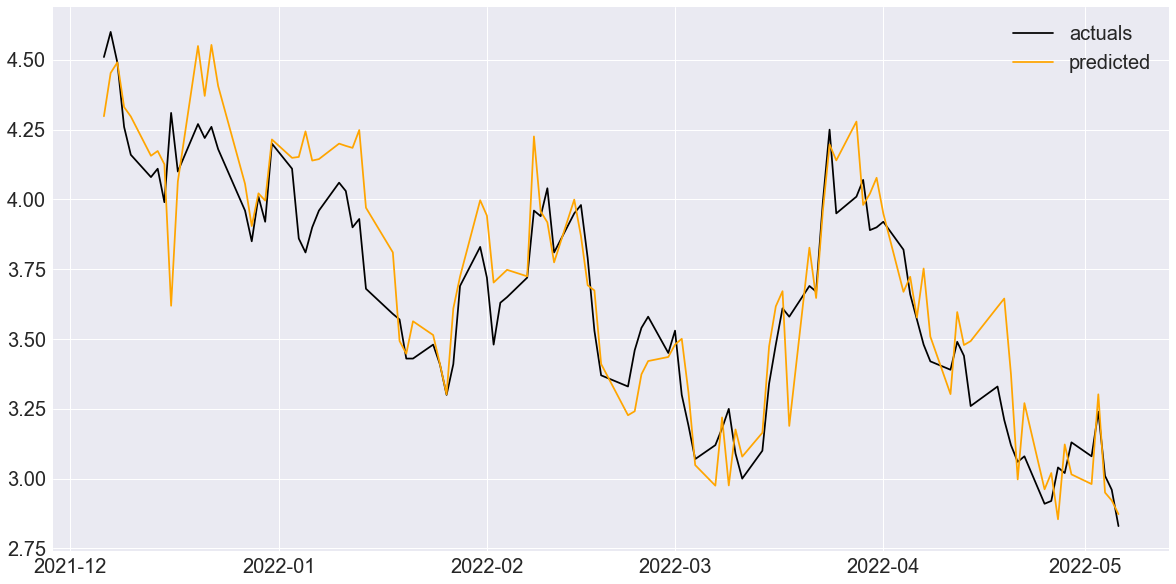

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['cron_next_close'], color='black')
ax.plot(y_test4['cron_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CRON target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy()
df5

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-02-27      2   27  2018        1  21.275000  21.377001  20.070000   
2018-02-28      2   28  2018        1  20.440001  21.680000  20.097000   
2018-03-01      3    1  2018        1  21.309999  23.379999  21.016001   
2018-03-02      3    2  2018        1  23.030001  23.209999  22.219999   
2018-03-05      3    5  2018        1  22.715000  25.100000  22.482000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-02-27  20.636000     1382600       21.549999       21.320000 -0.913999   
2018-02-28  21.320000      733600       20.636000       23.350000  0.684000   
2018-03-01  23.350000     1300700       21.320000       22.521999  2.030000   
2018-03-02  22.521999     1046100       23.350000       24.917000 -0.828001   
2018-03-05  24.917000     1714700       22.521999       25.600000  2.395001   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-02-27    -0.042413             21.8320            -0.5568   
2018-02-28     0.033146             21.5772            -0.2548   
2018-03-01     0.095216             21.7792             0.2020   
2018-03-02    -0.035460             21.8756             0.0964   
2018-03-05     0.106341             22.5490             0.6734   
...                 ...                 ...                ...   
2022-05-03     0.001653              5.7000             0.1520   
2022-05-04     0.100660              5.9880             0.2880   
2022-05-05    -0.089955              6.1120             0.1240   
2022-05-06    -0.016474              6.1640             0.0520   
2022-05-09    -0.070352              6.0640            -0.1000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-02-27              21.9175             -0.0756        0.00       0.000   
2018-02-28              21.9290              0.0115        0.00       0.000   
2018-03-01              22.0890              0.1600        0.00       0.000   
2018-03-02              22.0922              0.0032        0.00       0.000   
2018-03-05              22.4689              0.3767        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03               5.6420              0.0130        4.50       4.750   
2022-05-04               5.7360              0.0940        4.22       4.414   
2022-05-05               5.7680              0.0320        4.20       4.250   
2022-05-06               5.8080              0.0400        3.92       4.340   
2022-05-09               5.8060             -0.0020        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

951

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

951
106


In [172]:
X_train5 = train5.drop('cron_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-02-27      2   27  2018        1  21.275000  21.377001  20.070000   
2018-02-28      2   28  2018        1  20.440001  21.680000  20.097000   
2018-03-01      3    1  2018        1  21.309999  23.379999  21.016001   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-02-27     20.636     1382600       21.549999       21.320000 -0.913999   
2018-02-28     21.320      733600       20.636000       23.350000  0.684000   
2018-03-01     23.350     1300700       21.320000       22.521999  2.030000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-02-27    -0.042413             21.8320            -0.5568   
2018-02-28     0.033146             21.5772            -0.2548   
2018-03-01     0.095216             21.7792             0.2020   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-02-27              21.9175             -0.0756         0.0         0.0   
2018-02-28              21.9290              0.0115         0.0         0.0   
2018-03-01              22.0890              0.1600         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-02-27        0.0          0.0           0.0               0.0   
2018-02-28        0.0          0.0           0.0               0.0   
2018-03-01        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-02-27               0.0         0.0            0.0                   0.0   
2018-02-28               0.0         0.0            0.0                   0.0   
2018-03-01               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-02-27                  0.0                    0.0                   0.0   
2018-02-28                  0.0                    0.0                   0.0   
2018-03-01                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24       8.38     7.170        7.62    2801000.0   
2018-02-28       7.75       9.17     7.335        9.17    9875400.0   
2018-03-01       9.18      10.05     8.520        9.69   11858800.0   

            cron_prev_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2018-02-27             0.00       0.00      0.000000                  0.0   
2018-02-28             7.62       1.55      0.203412                  0.0   
2018-03-01             9.17       0.52      0.056707                  0.0   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2018-02-27                 0.0                   0.0                  0.0   
2018-02-28                 0.0                   0.0                  0.0   
2018-03-01                 0.0                   0.0                  0.0   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-02-27         0.0         0.0        0.0          0.0           0.0   
2018

In [173]:
X_train5.shape

(951, 393)

In [174]:
y_train5 = train5['cron_next_close']
y_train5.head(3)

Date
2018-02-27    9.17
2018-02-28    9.69
2018-03-01    9.40
Name: cron_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2021-12-01    4.40
2021-12-02    4.16
2021-12-03    4.32
Name: cron_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('cron_next_close', axis=1)
y_test5 = test5['cron_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-06     12    6  2021        4      9.98    10.315    9.540      10.15   
2021-12-07     12    7  2021        4     10.21    10.929   10.130      10.64   
2021-12-08     12    8  2021        4     10.71    11.198   10.355      10.94   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-06     7578800            9.99           10.64      0.16     0.016016   
2021-12-07     8810500           10.15           10.94      0.49     0.048276   
2021-12-08     5505400           10.64           10.20      0.30     0.028195   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-06              10.230             -0.182               10.904   
2021-12-07              10.216             -0.014               10.803   
2021-12-08              10.416              0.200               10.735   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-06              -0.203        7.99       8.411      7.593   
2021-12-07              -0.101        7.57       8.204      7.560   
2021-12-08              -0.068        7.56       8.209      7.560   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-06        7.600      865500.0             8.090             7.754   
2021-12-07        7.754      663000.0             7.600             8.130   
2021-12-08        8.130      576200.0             7.754             7.880   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-06      -0.490      -0.060569                8.0220   
2021-12-07       0.154       0.020263                7.9388   
2021-12-08       0.376       0.048491                7.9648   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-06              -0.1600                 8.3263               -0.1180   
2021-12-07              -0.0832                 8.2807               -0.0456   
2021-12-08               0.0260                 8.2142               -0.0665   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-06       4.12      4.385      3.96        4.32    2676000.0   
2021-12-07       4.38      4.585      4.36        4.51    2674500.0   
2021-12-08       4.51      4.730      4.40        4.60    2149800.0   

            cron_prev_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2021-12-06             4.16       0.16      0.038462                4.324   
2021-12-07             4.32       0.19      0.043981                4.320   
2021-12-08             4.51       0.09      0.019956                4.398   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2021-12-06              -0.028                 4.493               -0.061   
2021-12-07              -0.004                 4.475               -0.018   
2021-12-08               0.078                 4.467               -0.008   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2021-12-06       9.305       9.754      8.540         8.57     1050300.0   
2021-12-07       8.215  

In [178]:
X_test5.shape

(106, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-04    3.01
2022-05-05    2.96
2022-05-06    2.83
Name: cron_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([4.19692704, 4.48758913, 4.4455511 , 4.32701289, 4.6906204 ])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

0.5993568833430326


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

0.5491863142709295


In [184]:
hyper_table.append(dict(version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

In [185]:
y_train5 = pd.DataFrame(y_train5, columns=['cron_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['cron_next_close'])

In [186]:
y_test5['cron_pred_next_close'] = y_pred5

In [187]:
y_test5.tail()

cron_next_close  cron_pred_next_close
Date                                             
2022-05-02             3.08              3.706650
2022-05-03             3.24              3.958136
2022-05-04             3.01              3.475664
2022-05-05             2.96              3.754291
2022-05-06             2.83              3.830736

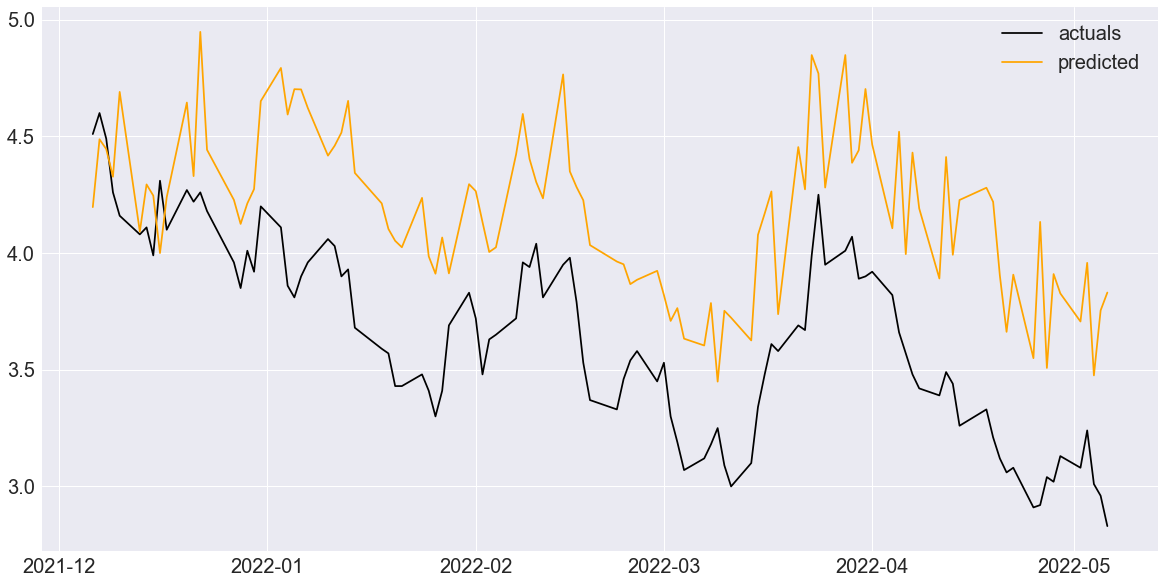

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['cron_next_close'], color='black')
ax.plot(y_test5['cron_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CRON target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy()
df6

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-02-27      2   27  2018        1  21.275000  21.377001  20.070000   
2018-02-28      2   28  2018        1  20.440001  21.680000  20.097000   
2018-03-01      3    1  2018        1  21.309999  23.379999  21.016001   
2018-03-02      3    2  2018        1  23.030001  23.209999  22.219999   
2018-03-05      3    5  2018        1  22.715000  25.100000  22.482000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-02-27  20.636000     1382600       21.549999       21.320000 -0.913999   
2018-02-28  21.320000      733600       20.636000       23.350000  0.684000   
2018-03-01  23.350000     1300700       21.320000       22.521999  2.030000   
2018-03-02  22.521999     1046100       23.350000       24.917000 -0.828001   
2018-03-05  24.917000     1714700       22.521999       25.600000  2.395001   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-02-27    -0.042413             21.8320            -0.5568   
2018-02-28     0.033146             21.5772            -0.2548   
2018-03-01     0.095216             21.7792             0.2020   
2018-03-02    -0.035460             21.8756             0.0964   
2018-03-05     0.106341             22.5490             0.6734   
...                 ...                 ...                ...   
2022-05-03     0.001653              5.7000             0.1520   
2022-05-04     0.100660              5.9880             0.2880   
2022-05-05    -0.089955              6.1120             0.1240   
2022-05-06    -0.016474              6.1640             0.0520   
2022-05-09    -0.070352              6.0640            -0.1000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-02-27              21.9175             -0.0756        0.00       0.000   
2018-02-28              21.9290              0.0115        0.00       0.000   
2018-03-01              22.0890              0.1600        0.00       0.000   
2018-03-02              22.0922              0.0032        0.00       0.000   
2018-03-05              22.4689              0.3767        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03               5.6420              0.0130        4.50       4.750   
2022-05-04               5.7360              0.0940        4.22       4.414   
2022-05-05               5.7680              0.0320        4.20       4.250   
2022-05-06               5.8080              0.0400        3.92       4.340   
2022-05-09               5.8060             -0.0020        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

951

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

951
106


In [202]:
X_train6 = train6.drop('cron_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-02-27      2   27  2018        1  21.275000  21.377001  20.070000   
2018-02-28      2   28  2018        1  20.440001  21.680000  20.097000   
2018-03-01      3    1  2018        1  21.309999  23.379999  21.016001   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-02-27     20.636     1382600       21.549999       21.320000 -0.913999   
2018-02-28     21.320      733600       20.636000       23.350000  0.684000   
2018-03-01     23.350     1300700       21.320000       22.521999  2.030000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-02-27    -0.042413             21.8320            -0.5568   
2018-02-28     0.033146             21.5772            -0.2548   
2018-03-01     0.095216             21.7792             0.2020   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-02-27              21.9175             -0.0756         0.0         0.0   
2018-02-28              21.9290              0.0115         0.0         0.0   
2018-03-01              22.0890              0.1600         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-02-27        0.0          0.0           0.0               0.0   
2018-02-28        0.0          0.0           0.0               0.0   
2018-03-01        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-02-27               0.0         0.0            0.0                   0.0   
2018-02-28               0.0         0.0            0.0                   0.0   
2018-03-01               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-02-27                  0.0                    0.0                   0.0   
2018-02-28                  0.0                    0.0                   0.0   
2018-03-01                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24       8.38     7.170        7.62    2801000.0   
2018-02-28       7.75       9.17     7.335        9.17    9875400.0   
2018-03-01       9.18      10.05     8.520        9.69   11858800.0   

            cron_prev_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2018-02-27             0.00       0.00      0.000000                  0.0   
2018-02-28             7.62       1.55      0.203412                  0.0   
2018-03-01             9.17       0.52      0.056707                  0.0   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2018-02-27                 0.0                   0.0                  0.0   
2018-02-28                 0.0                   0.0                  0.0   
2018-03-01                 0.0                   0.0                  0.0   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-02-27         0.0         0.0        0.0          0.0           0.0   
2018

In [203]:
X_train6.shape

(951, 419)

In [204]:
y_train6 = train6['cron_next_close']
y_train6.head(3)

Date
2018-02-27    9.17
2018-02-28    9.69
2018-03-01    9.40
Name: cron_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2021-12-01    4.40
2021-12-02    4.16
2021-12-03    4.32
Name: cron_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('cron_next_close', axis=1)
y_test6 = test6['cron_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-06     12    6  2021        4      9.98    10.315    9.540      10.15   
2021-12-07     12    7  2021        4     10.21    10.929   10.130      10.64   
2021-12-08     12    8  2021        4     10.71    11.198   10.355      10.94   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-06     7578800            9.99           10.64      0.16     0.016016   
2021-12-07     8810500           10.15           10.94      0.49     0.048276   
2021-12-08     5505400           10.64           10.20      0.30     0.028195   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-06              10.230             -0.182               10.904   
2021-12-07              10.216             -0.014               10.803   
2021-12-08              10.416              0.200               10.735   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-06              -0.203        7.99       8.411      7.593   
2021-12-07              -0.101        7.57       8.204      7.560   
2021-12-08              -0.068        7.56       8.209      7.560   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-06        7.600      865500.0             8.090             7.754   
2021-12-07        7.754      663000.0             7.600             8.130   
2021-12-08        8.130      576200.0             7.754             7.880   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-06      -0.490      -0.060569                8.0220   
2021-12-07       0.154       0.020263                7.9388   
2021-12-08       0.376       0.048491                7.9648   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-06              -0.1600                 8.3263               -0.1180   
2021-12-07              -0.0832                 8.2807               -0.0456   
2021-12-08               0.0260                 8.2142               -0.0665   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-06       4.12      4.385      3.96        4.32    2676000.0   
2021-12-07       4.38      4.585      4.36        4.51    2674500.0   
2021-12-08       4.51      4.730      4.40        4.60    2149800.0   

            cron_prev_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2021-12-06             4.16       0.16      0.038462                4.324   
2021-12-07             4.32       0.19      0.043981                4.320   
2021-12-08             4.51       0.09      0.019956                4.398   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2021-12-06              -0.028                 4.493               -0.061   
2021-12-07              -0.004                 4.475               -0.018   
2021-12-08               0.078                 4.467               -0.008   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2021-12-06       9.305       9.754      8.540         8.57     1050300.0   
2021-12-07       8.215  

In [208]:
X_test6.shape

(106, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-04    3.01
2022-05-05    2.96
2022-05-06    2.83
Name: cron_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([4.22168265, 4.50282947, 4.46223982, 4.38342911, 4.75475712])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

0.6810958356428515


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

0.625276582729702


In [214]:
hyper_table.append(dict(version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

In [215]:
y_train6 = pd.DataFrame(y_train6, columns=['cron_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['cron_next_close'])

In [216]:
y_test6['cron_pred_next_close'] = y_pred6

In [217]:
y_test6.tail()

cron_next_close  cron_pred_next_close
Date                                             
2022-05-02             3.08              3.747108
2022-05-03             3.24              3.977743
2022-05-04             3.01              3.643367
2022-05-05             2.96              3.873687
2022-05-06             2.83              3.947487

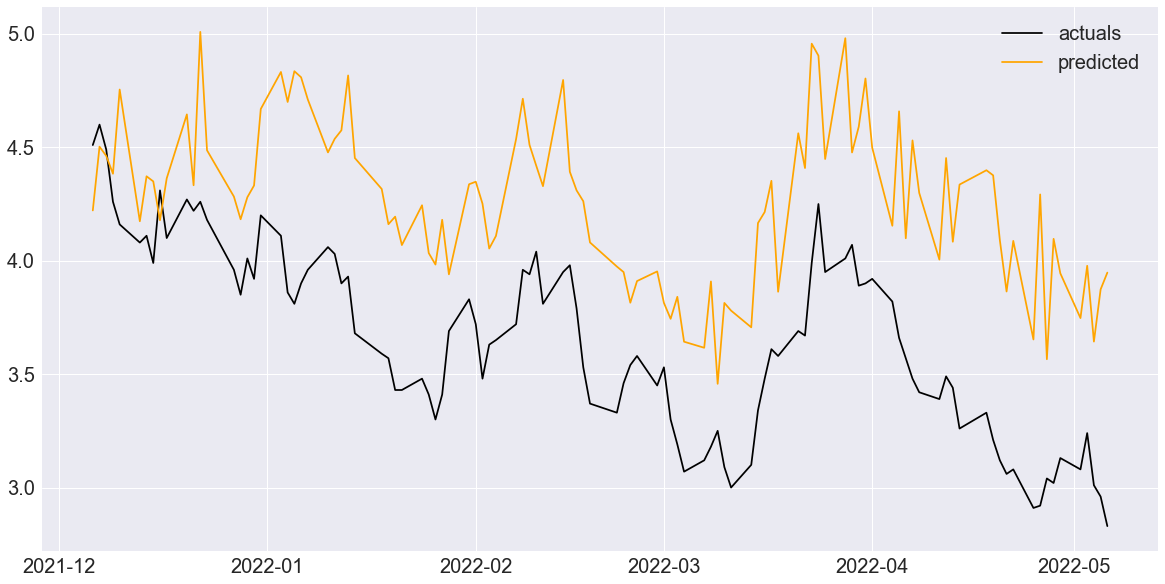

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['cron_next_close'], color='black')
ax.plot(y_test6['cron_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

version               model      rmse       mae  rows  train_rows  \
1        1+ETFs  LinearRegression()  0.137362  0.117010  1057         951   
0         1+Dow  LinearRegression()  0.147685  0.114077  1057         951   
2    1+ETFs+Dow  LinearRegression()  0.154699  0.126532  1057         951   
3    All stocks  LinearRegression()  0.158936  0.115781  1057         951   
4       All+Dow  LinearRegression()  0.174908  0.134831  1057         951   
5      All+ETFs  LinearRegression()  0.599357  0.549186  1057         951   
6  All+ETFs+Dow  LinearRegression()  0.681096  0.625277  1057         951   

   test_rows  columns  
1        106      160  
0        106       56  
2        106      186  
3        106      264  
4        106      290  
5        106      394  
6        106      420

In [220]:
# hyper_table.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table.csv', index=False)